Objective function is [1921.033485856205, 1338.087854201209, 1115.5344812362398, 592.5283842592463, 549.4502743616728, 399.37361987424936, 305.45409851538983, 240.3794892166908, 298.92660831452383]
Objective function values Initialization:1
K:[2, 3, 4, 5, 6, 7, 8, 9, 10]
J(K):[1921.033485856205, 1338.087854201209, 1115.5344812362398, 592.5283842592463, 549.4502743616728, 399.37361987424936, 305.45409851538983, 240.3794892166908, 298.92660831452383]




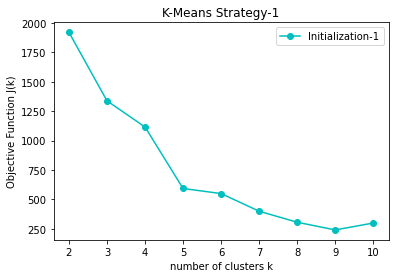

Objective function is [1921.033485856206, 1293.777452391135, 788.2734352397214, 592.877929265473, 549.0022323491788, 362.9331140450499, 305.45409851538966, 288.1028628297239, 229.72789036274077]
Objective function values Initialization:2
K:[2, 3, 4, 5, 6, 7, 8, 9, 10]
J(K):[1921.033485856206, 1293.777452391135, 788.2734352397214, 592.877929265473, 549.0022323491788, 362.9331140450499, 305.45409851538966, 288.1028628297239, 229.72789036274077]




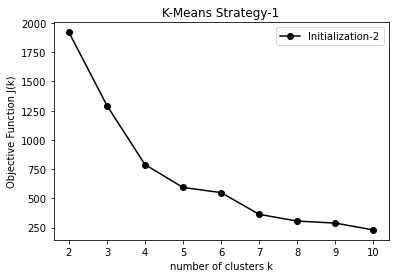

In [20]:
import scipy.io, numpy as np,random, sys,math, matplotlib.pyplot as plt
from scipy.spatial import distance

inputFile=scipy.io.loadmat("AllSamples.mat")['AllSamples']
inputFileDimensions = inputFile.shape

centers = []
clustersCentroid={}
clustersPoints={}
newcenters = []

initialization = 0 
x='c'

while initialization <=1:
    J=[]
    for i in range(2,11):
        centers = [] # this list stores the centroids which are randomly chosen from the data points
        clustersCentroid={} # this is a dictionary which assigns a Cluster to every centroid
        clustersPoints={}
        newcenters = []
        randomGeneratorIndices = np.random.choice(inputFileDimensions[0],i,replace = False) # this is used to generate the indices randomly

        #this is used to assign random points as centers to centers list
        for j in randomGeneratorIndices:
            centers.append(inputFile[j])
        #newcenters initially has None . It is used for updating centers on successive iterations
        for i in range(len(randomGeneratorIndices)):
            newcenters.append(None)
        newcenters = np.array(newcenters)
        count=1
        #this is used to store cluster centroid points to respective clusters
        for center in centers:
            clustersCentroid["Cluster"+str(count)] = center
            count=count+1
        centers = np.array(centers) # this is used for converting centers to numpy array for computation purposes
        intermedList=[]
        for key,val in clustersCentroid.items(): #this is used to assign centroid points to each and every cluster initially
            intermedList.append(list(val))
            clustersPoints[key] = intermedList
            intermedList=[]
        flag = False
        #the data points are assigned to clusters until the centroids don't change. The data points are assigned to the cluster with minimum euclidean distance from the respective point
        while not np.array_equal(centers,newcenters): # the stopping condition for the algorithm to stop when the centers remain same and not change.
            if flag: # this is used for re-initializing the clusterpoints and clustercentroids for successive iterations until the algorithm converges
                clustersCentroid={}
                centers = newcenters
                count=1
                for center in centers:
                    clustersCentroid["Cluster"+str(count)] = center
                    count=count+1
                clustersPoints={}
                intermedList=[]
                for key,val in clustersCentroid.items():
                    intermedList.append(list(val))
                    clustersPoints[key] = intermedList
                    intermedList=[]
            #lines 59 to 77 are used for assigning data points to respective clusters
            for data in inputFile:
                if data not in centers:
                    minimum = sys.maxsize
                    minCenter = sys.maxsize
                    for center in centers:
                        dist=distance.euclidean(data,center) #the data points are assigned to the cluster with the smallest euclidean distance.
                        if dist < minimum:
                            minimum = dist
                            minCenter = center
                    for key, val in clustersCentroid.items():
                        if str(val) == str(minCenter):
                            if key not in clustersPoints.keys():
                                dataPts = []
                                dataPts.append(list(data))
                                clustersPoints[key] = dataPts
                            else:
                                dataPts = clustersPoints[key]
                                dataPts.append(list(data))
                                clustersPoints[key]=dataPts
            newcenters=[]
            for key,val in clustersPoints.items(): # this is the code for updating the centers after assigning all the data points to the respective clusters
                res=np.mean(val,axis=0)
                newcenters.append(res)
            newcenters = np.array(newcenters) # this is used for converting newcenters to numpy array for computation purposes
            flag = True
        index = 0
        for key,val in clustersCentroid.items(): # this is for updating the clusterscentroid with new centers for successive iterations
            clustersCentroid[key] = centers[index]
            index+=1

        #code for calculating objective function
        sse = 0
        for key,val in clustersPoints.items():
            centerKeyVal = list(clustersCentroid.get(key))
            for value in val:
                dist = distance.euclidean(value,centerKeyVal)
                distSquared = math.pow(dist,2)
                sse+=distSquared
        J.append(sse)

    print("Objective function is %s" % J)

    #code for plotting graphs
    K=[k for k in range(2,11)]
    plt.title("K-Means Strategy-1")
    l='Initialization-'+str(initialization+1)
    plt.ylabel('Objective Function J(k)')
    plt.xlabel('number of clusters k')
    plt.plot(K,J,x,marker='o',label=l)
    plt.legend()
    print("Objective function values Initialization:"+str(initialization+1))
    print("K:"+str(K))
    print("J(K):"+str(J))
    print("\n")
    plt.show()
    initialization+=1
    x='black'
    #z=5
plt.show()